
# Atividade 0 — Transformações Lineares: Rotação e Cisalhamento

### **Descrição da Tarefa**
Este notebook demonstra, de forma **numérica** e **gráfica**, dois tipos de **transformações lineares em 2D**:

1. **Rotação horária de 90°**
2. **Cisalhamento (shear) no eixo x**

Além disso, serão mostradas:
- As **matrizes de transformação** obtidas a partir dos **vetores unitários** (bases canônicas);
- A **aplicação passo a passo** dessas matrizes em **dois vetores arbitrários**, com resultados **numéricos** e **gráficos**.

---


In [1]:

# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Configuração de estilo dos gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (6,6)


In [2]:

def plot_vectors(vectors, colors, labels, title):
    """
    Função auxiliar para plotar vetores no plano 2D.
    """
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid(True, linestyle='--', alpha=0.5)
    for v, c, l in zip(vectors, colors, labels):
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=c, label=l)
    plt.legend()
    plt.title(title)
    plt.show()



## 🔹 Bases Canônicas

Os vetores unitários que compõem a **base canônica** do plano 2D são:

$$
\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

Esses vetores serão usados para **construir as matrizes de transformação**.


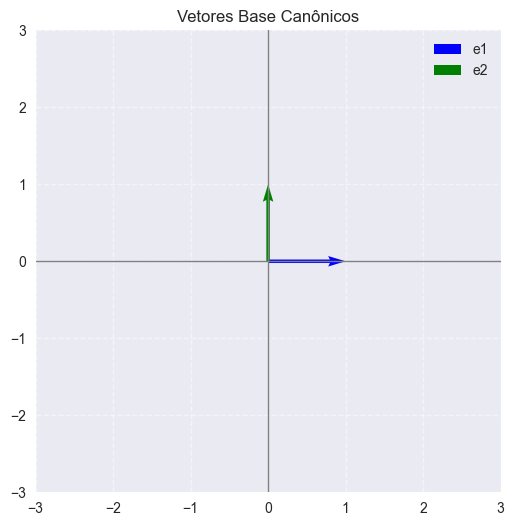

In [3]:

# Vetores base canônicos
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Plot das bases
plot_vectors([e1, e2], ['blue', 'green'], ['e1', 'e2'], 'Vetores Base Canônicos')



## 🔹 Rotação Horária de 90°

Uma **rotação horária** de 90° (ou -90° no sentido trigonométrico) tem matriz:

$$
R_{-90} = \begin{bmatrix}
0 & 1 \\
-1 & 0
\end{bmatrix}
$$

Essa matriz transforma as bases conforme:

$$
R_{-90} \cdot \mathbf{e_1} = \begin{bmatrix} 0 \\ -1 \end{bmatrix}, \quad
R_{-90} \cdot \mathbf{e_2} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$


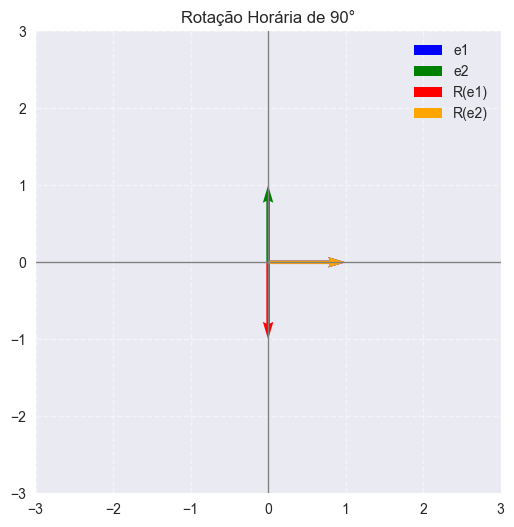

R * e1 = [ 0 -1]
R * e2 = [1 0]


In [4]:

# Matriz de rotação horária (−90°)
R = np.array([[0, 1],
              [-1, 0]])

# Aplicação sobre as bases
e1_rot = R @ e1
e2_rot = R @ e2

# Plot
plot_vectors([e1, e2, e1_rot, e2_rot],
             ['blue', 'green', 'red', 'orange'],
             ['e1', 'e2', 'R(e1)', 'R(e2)'],
             'Rotação Horária de 90°')

print("R * e1 =", e1_rot)
print("R * e2 =", e2_rot)



## 🔹 Cisalhamento (Shear) em x

O **cisalhamento em x** desloca proporcionalmente os pontos ao longo do eixo x, conforme o valor de *k*:

$$
H_x = \begin{bmatrix}
1 & k \\
0 & 1
\end{bmatrix}
$$

A nova base é obtida aplicando $H_x$ a $\mathbf{e_1}$ e $\mathbf{e_2}$.


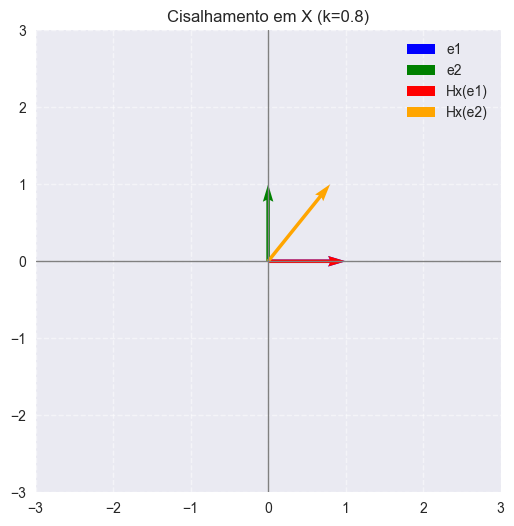

Hx * e1 = [1. 0.]
Hx * e2 = [0.8 1. ]


In [5]:

# Matriz de cisalhamento em x
k = 0.8 # O parâmetro k controla o grau de inclinação (ou deformação) do plano
Hx = np.array([[1, k],
               [0, 1]])

# Aplicação sobre as bases
e1_shear = Hx @ e1
e2_shear = Hx @ e2

# Plot
plot_vectors([e1, e2, e1_shear, e2_shear],
             ['blue', 'green', 'red', 'orange'],
             ['e1', 'e2', 'Hx(e1)', 'Hx(e2)'],
             f'Cisalhamento em X (k={k})')

print("Hx * e1 =", e1_shear)
print("Hx * e2 =", e2_shear)



## 🔹 Aplicação das Transformações a Vetores Arbitrários

Agora, aplicamos as duas transformações — **rotação** e **cisalhamento** — a **dois vetores arbitrários**:

$$
\mathbf{v_1} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}, \quad
\mathbf{v_2} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}
$$

Mostraremos **passo a passo** as transformações.


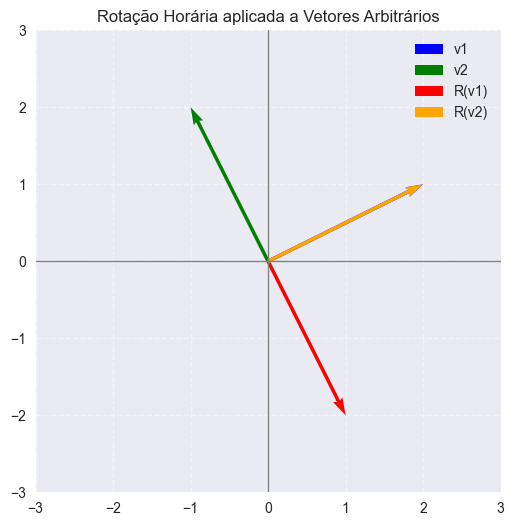

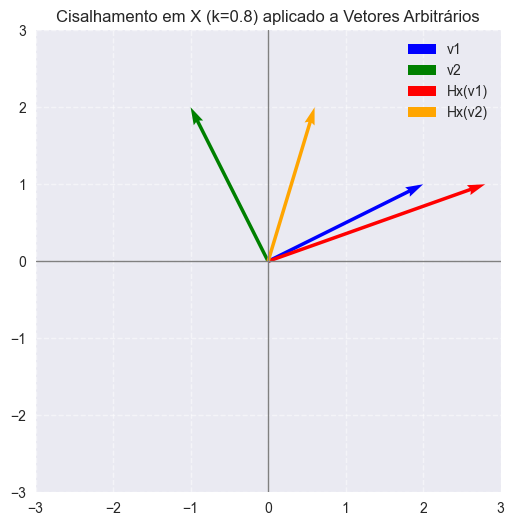

v1_rot = [ 1 -2]
v2_rot = [2 1]
v1_shear = [2.8 1. ]
v2_shear = [0.6 2. ]


In [6]:

# Vetores arbitrários
v1 = np.array([2, 1])
v2 = np.array([-1, 2])

# Aplicando rotação e cisalhamento
v1_rot = R @ v1
v2_rot = R @ v2

v1_shear = Hx @ v1
v2_shear = Hx @ v2

# Visualização da rotação
plot_vectors([v1, v2, v1_rot, v2_rot],
             ['blue', 'green', 'red', 'orange'],
             ['v1', 'v2', 'R(v1)', 'R(v2)'],
             'Rotação Horária aplicada a Vetores Arbitrários')

# Visualização do cisalhamento
plot_vectors([v1, v2, v1_shear, v2_shear],
             ['blue', 'green', 'red', 'orange'],
             ['v1', 'v2', 'Hx(v1)', 'Hx(v2)'],
             f'Cisalhamento em X (k={k}) aplicado a Vetores Arbitrários')

# Resultados numéricos
print("v1_rot =", v1_rot)
print("v2_rot =", v2_rot)
print("v1_shear =", v1_shear)
print("v2_shear =", v2_shear)



---
## Conclusão

Neste notebook, implementamos **duas transformações lineares**:

1. **Rotação horária de 90°**
2. **Cisalhamento em x (k = 0.8)**

Foram obtidas as **matrizes de transformação** a partir das **bases canônicas** e aplicadas a vetores arbitrários, 
com representações **numéricas** e **gráficas**.
